##  Import necessary libaraies

In [89]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

The Titanic Problem is based on the sinking of the ‘Unsinkable’ ship Titanic in early 1912. It gives you information about multiple people like their ages, sexes, sibling counts, embarkment points, and whether or not they survived the disaster. 

Based on these features, you have to predict if an arbitrary passenger on Titanic would survive the sinking or not. 

Attribute Information
* Passenger id- Unique Id of the passenger
* Pclass- Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)
* Survived- Survived (0 = No; 1 = Yes)
* Name- Name of the passenger
* Sex- Sex of the passenger (Male, Female)
* Age- Age of the passenger
* Sibsp- Number of Siblings/Spouses Aboard

## Import Dataset

In [90]:
# Covert csv to dataframe
df = pd.read_csv("https://raw.githubusercontent.com/dsrscientist/dataset1/master/titanic_train.csv")

df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


This dataset contains the details of customers in which bother numerical and categorical data are present. Here "Survived" is the target variable which contains 2 categories so it will be termed as "Classification problem" where need to predict the passenger has Survived or not.

## Exploratory Data Analysis (EDA)

In [91]:
# Sample of rows
df.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
782,783,0,1,"Long, Mr. Milton Clyde",male,29.0,0,0,113501,30.0000,D6,S
610,611,0,3,"Andersson, Mrs. Anders Johan (Alfrida Konstant...",female,39.0,1,5,347082,31.2750,NaN,S
652,653,0,3,"Kalvik, Mr. Johannes Halvorsen",male,21.0,0,0,8475,8.4333,NaN,S
844,845,0,3,"Culumovic, Mr. Jeso",male,17.0,0,0,315090,8.6625,NaN,S
794,795,0,3,"Dantcheff, Mr. Ristiu",male,25.0,0,0,349203,7.8958,NaN,S


In [92]:
print("This data contains rows and columns",df.shape)

This data contains rows and columns (891, 12)


In [93]:
print("Columns name, datatype and count\n")
df.info()

Columns name, datatype and count

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In this dataset two columns has float64 and  five has int65 remning 5 has object. We see also some columns has missing values.

In [94]:
# Checking the missing values of the dataset
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In this dataset Age and Cabin and Embarked has missing values in Age, Cabin and Embarked. Cabin 80% has missing. Let's visualize it using heatmap

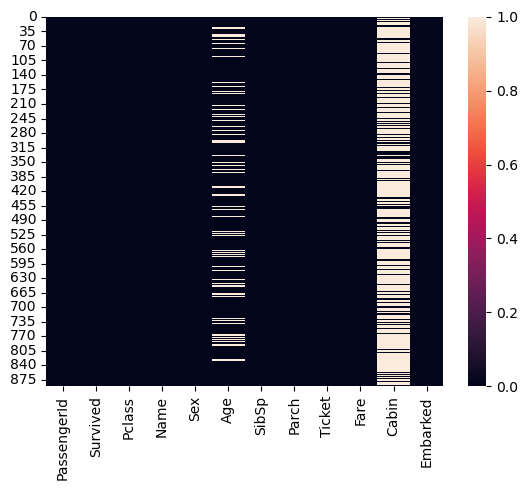

In [95]:
# Let's visualize it using heatmap
sns.heatmap(df.isnull())
plt.show()

And we can clearly visualize that there is missing values. And cabin columns has 70% data is missing. So we can remove it.

In [96]:
# Removoing Cabin columns 
df = df.drop(columns = ['Cabin'],axis=1)

We remove cabin column it has 70% data has missing.

In [97]:
# Checking the duplicates values
df.duplicated().sum()

0

It the dataset has not any dupliate value.

In [98]:
# Checking  the value counts of each columns
for i in df.columns:
    print(df[i].value_counts())
    print('\n')

PassengerId
1      1
599    1
588    1
589    1
590    1
      ..
301    1
302    1
303    1
304    1
891    1
Name: count, Length: 891, dtype: int64


Survived
0    549
1    342
Name: count, dtype: int64


Pclass
3    491
1    216
2    184
Name: count, dtype: int64


Name
Braund, Mr. Owen Harris                     1
Boulos, Mr. Hanna                           1
Frolicher-Stehli, Mr. Maxmillian            1
Gilinski, Mr. Eliezer                       1
Murdlin, Mr. Joseph                         1
                                           ..
Kelly, Miss. Anna Katherine "Annie Kate"    1
McCoy, Mr. Bernard                          1
Johnson, Mr. William Cahoone Jr             1
Keane, Miss. Nora A                         1
Dooley, Mr. Patrick                         1
Name: count, Length: 891, dtype: int64


Sex
male      577
female    314
Name: count, dtype: int64


Age
24.00    30
22.00    27
18.00    26
19.00    25
28.00    25
         ..
36.50     1
55.50     1
0.92      1
23.50  

SibSp and Parch it seems not much difference. SibSp and Parch would make more sense as a combined feature.

In [99]:
# Checking the unique values of each columns
df.nunique().to_frame("No. of unique values")

,No. of unique values
PassengerId,891
Survived,2
Pclass,3
Name,891
Sex,2
Age,88
SibSp,7
Parch,7
Ticket,681
Fare,248


In [100]:
# Filled value in Embarked using fillna
df['Embarked']  = df['Embarked'].fillna(df['Embarked'].mode()[0])

In [101]:
# Verify value is filled sucessfully
df['Embarked'].isnull().sum()

0

We can filled missing values in Embarked using fillna mode method because it is a categorical column.

In [102]:
# Missing values in Age column
df[df['Sex'].isin(['male']) & df['Age'].isna()].head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,Q
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,S


In [103]:
df[df['Sex'].isin(['female']) & df['Age'].isna()].head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,C
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,Q


In [104]:
# Filling missing value of male Age and female age with its mean
df['Age'].fillna(df.groupby('Sex')['Age'].transform('mean'),inplace=True)

We can filled missing values in Age columns with mean Age of male and mean Age of female.

In [105]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [106]:
df.iloc[4:5]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.05,S


In [107]:
df.iloc[19:20]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
19,20,1,3,"Masselmani, Mrs. Fatima",female,27.915709,0,0,2649,7.225,C


We verify sucessfully filled Age missing values with male and female mean values.

### Description of Dataset

In [108]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.736034,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.014897,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,30.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


This gives the statistical information of the numerical columns. We see that only Age and Fare are numerical columns.

From the abive description we can observe the following :-
    
 1. The counts of all the columns are same which means there are no missing values in the dataset.
 2. In Age column have mean value less than median (50%) value and huge difference between 75% and max.
 3. In Fare the std is greater than mean value and mean is greater than median(50%) and huge difference between 75% and max.
 4. By summarizing the data we can observe there are outliers present in the data.

In [109]:
# Checking the value count of target
df['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

Survived (0 = No; 1 = Yes)

In [110]:
(df['Survived'].value_counts()/df.shape[0])*100

Survived
0    61.616162
1    38.383838
Name: count, dtype: float64

We can observe the class is balance.

In [111]:
# Cretae a new column Family with combine of SibSp and Parch
df['Family'] = df['SibSp'] + df['Parch'] + 1
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Family
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1


SibSp and Parch would make more sense as a combined feature, that shows the total number of family members and relatives.

In [112]:
# Checking the value count of Family
df['Family'].value_counts()

Family
1     537
2     161
3     102
4      29
6      22
5      15
7      12
11      7
8       6
Name: count, dtype: int64

We can observe that Chance of survived with family members.

In [113]:
# percentage of passengers who survived each class
df.groupby('Pclass')['Survived'].mean()*100

Pclass
1    62.962963
2    47.282609
3    24.236253
Name: Survived, dtype: float64

Passenegers Of Pclass 1 has a very high priority to survive. but still the number of survival from Pclass 3 is low compare to them

In [114]:
# percentage of passengers who survived male and female
df.groupby('Sex')['Survived'].mean()*100

Sex
female    74.203822
male      18.890815
Name: Survived, dtype: float64

The number of men on board the ship is much higher than the number of women, but the number of women saved is more than twice that of the number of males survived.

In [115]:
# percentage of passengers who survived each port
df.groupby('Embarked')['Survived'].mean()

Embarked
C    0.553571
Q    0.389610
S    0.339009
Name: Survived, dtype: float64

Passenegers of Cherbourg plot has high priority to survive. and Queenstown or Southampton almost same percentage.

In [116]:
# percentage of passengers who survived with family
df.groupby('Family')['Survived'].mean()

Family
1     0.303538
2     0.552795
3     0.578431
4     0.724138
5     0.200000
6     0.136364
7     0.333333
8     0.000000
11    0.000000
Name: Survived, dtype: float64

Passenegers with there family almost 3 and 4 members have very high priority to survive. They have single low priority to survive. 

In [117]:
def column(number):
    if number == 1:
        return 'Alone'
    elif number>1 and number<5:
        return 'Medium'
    else:
        return 'Large'

In [118]:
df['Family_size'] = df['Family'].apply(column)

In [119]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Family,Family_size
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,2,Medium
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,2,Medium
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,1,Alone
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,2,Medium
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1,Alone


In [120]:
# Drop wanted columns
df = df.drop(columns=['PassengerId','Name','SibSp','Parch','Family','Ticket'],axis=1)
df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Family_size
0,0,3,male,22.0,7.2500,S,Medium
1,1,1,female,38.0,71.2833,C,Medium
2,1,3,female,26.0,7.9250,S,Alone
3,1,1,female,35.0,53.1000,S,Medium
4,0,3,male,35.0,8.0500,S,Alone


We can drop those columns which have no used for model building.

## Data Visualization

### Univariate Analysis

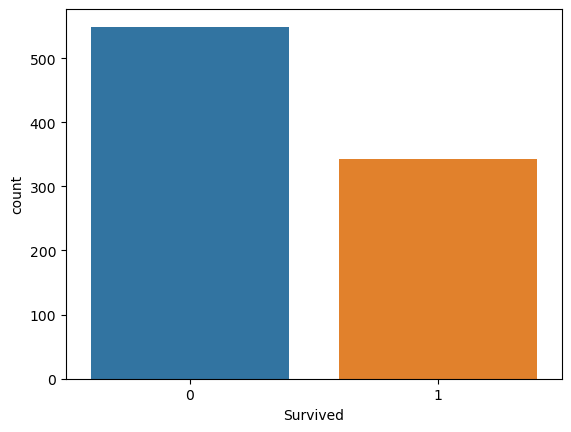

In [121]:
# Visualize the target column
sns.countplot(x='Survived',data=df)
plt.show()

Wecan observe that the count of "No Survived" and count of "Survived" classes are balance.

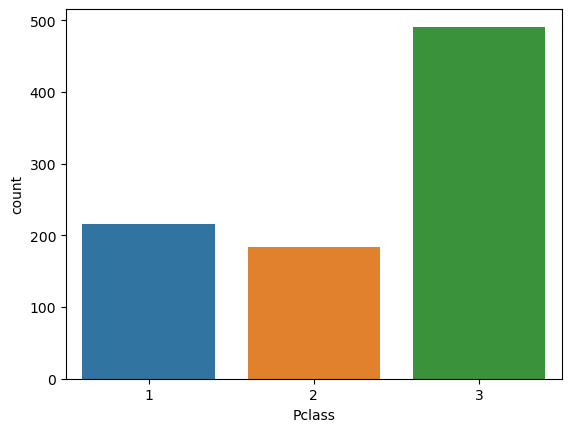

In [122]:
# Visualize the count of Pclass
sns.countplot(x='Pclass',data=df)
plt.show()

Here 1st class and 2nd class has equal number passenger but 3rd class has highest number of passenger.

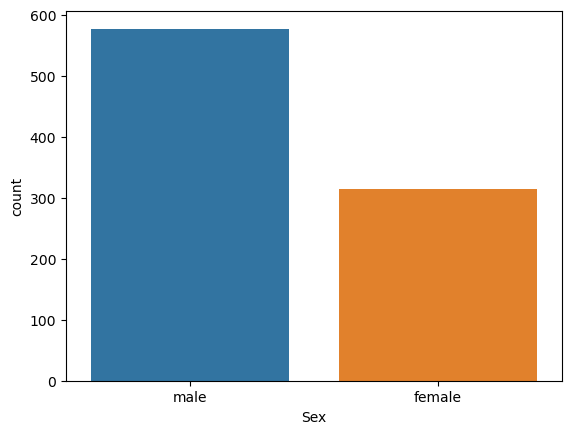

In [123]:
# Visualize the count of male and female
sns.countplot(x='Sex',data=df)
plt.show()

From the plot we can observe that the total number of male count is high than female. We can observe that chance of Survived male is less than female.

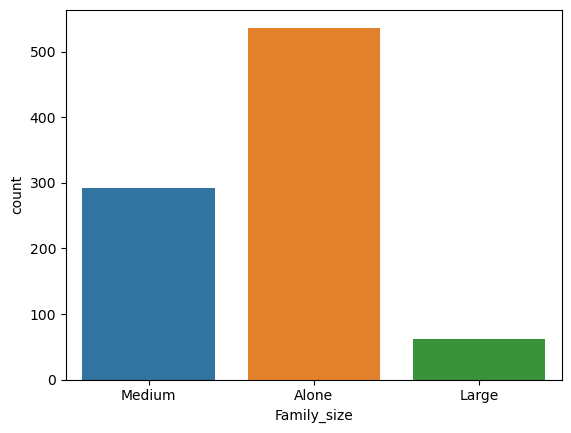

In [124]:
# Visualize the count of Family
sns.countplot(x='Family_size',data=df)
plt.show()

We can observe that they have no family have highest frequency.

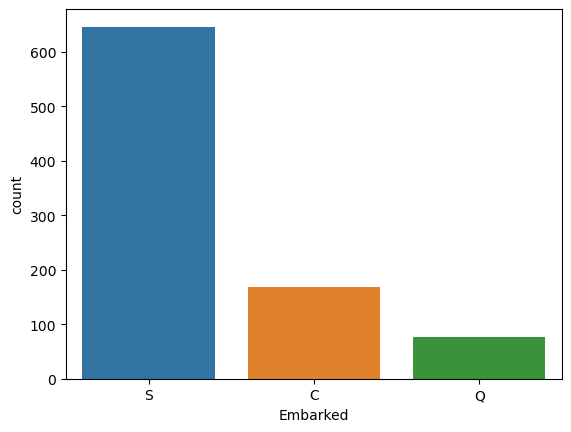

In [125]:
# Visualize the count of Embarked 
sns.countplot(x='Embarked',data=df)
plt.show()

We can observe that the most of the passenger have belond to Cherbourg plot.

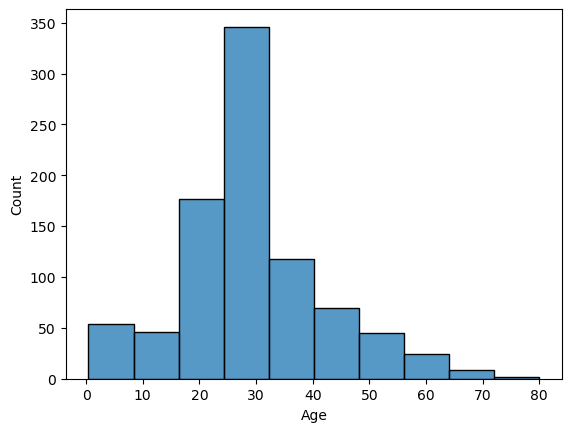

In [126]:
# Visualize hist plot of Age column
sns.histplot(df['Age'],bins=10)
plt.show()

The passenger which age is 25 to 30 has frequency is very high. 

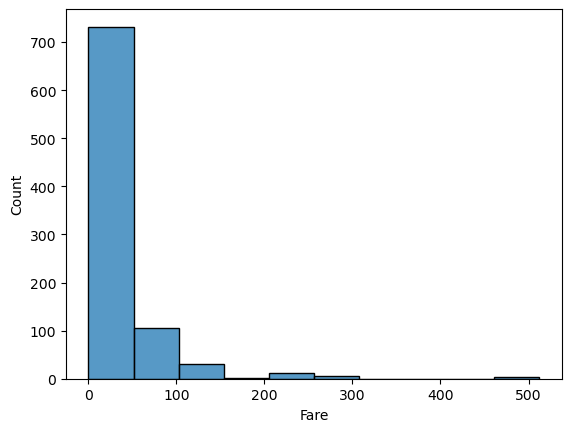

In [127]:
# Visualize hist plot of Fare column
sns.histplot(df['Fare'],bins=10)
plt.show()

The passenger which Fare is minmum has count is very high.

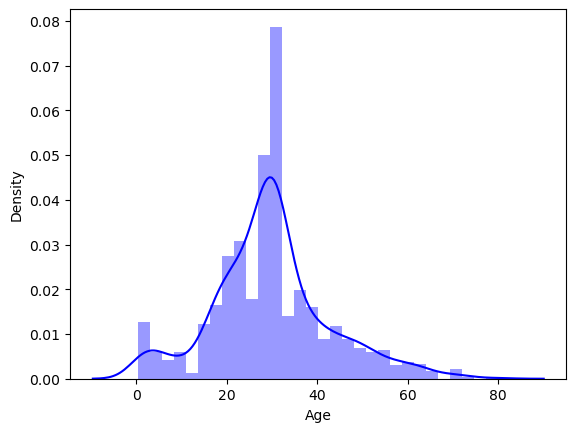

In [128]:
# Visualize the data distiribution of Age columns using distplot
sns.distplot(df['Age'],color='b')
plt.show()

The data in the column Age is skewed both side.

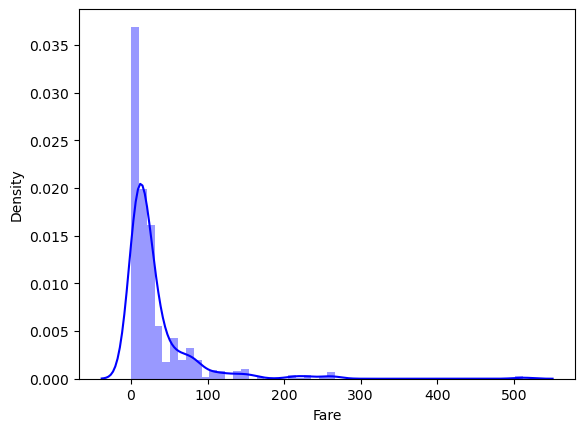

In [129]:
# Visualize the data distiribution of Fare columns using distplot
sns.distplot(df['Fare'],color='b')
plt.show()

Wecan notice that the data not normal in all the columns. The data in the column Fare is skewed the high.

### Bivariate Analysis

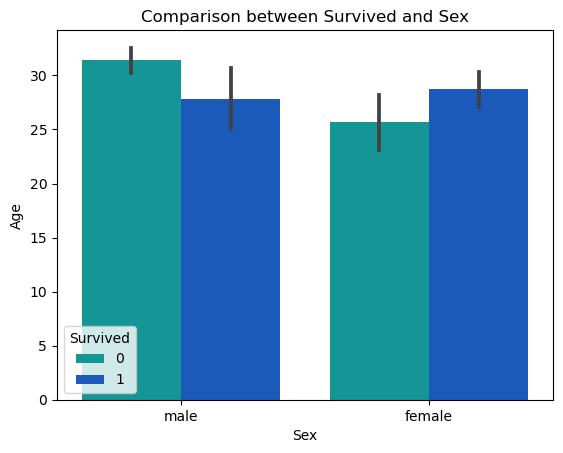

In [130]:
# comparing Sex and Pclass on the basis of Survived
plt.title("Comparison between Survived and Sex")
sns.barplot(x = "Sex",y = "Age", data = df, palette = "winter_r", hue = "Survived")
plt.show()

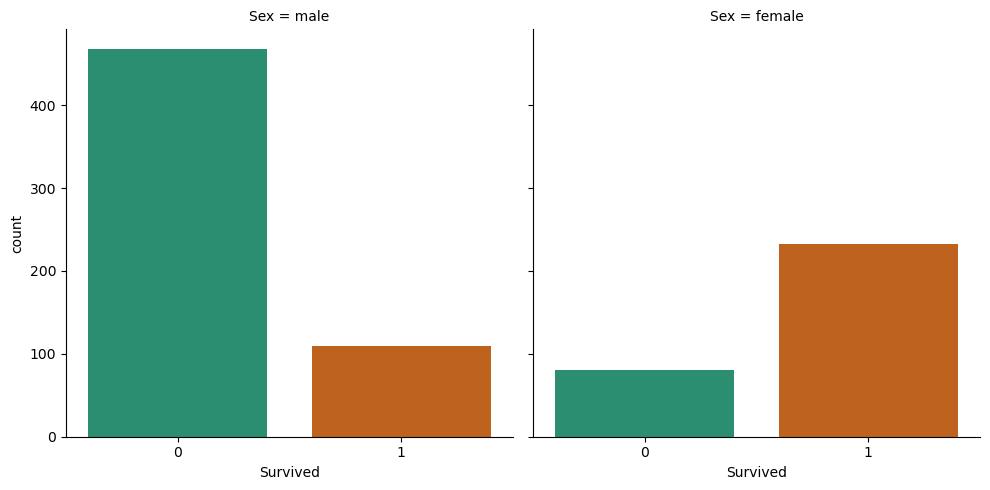

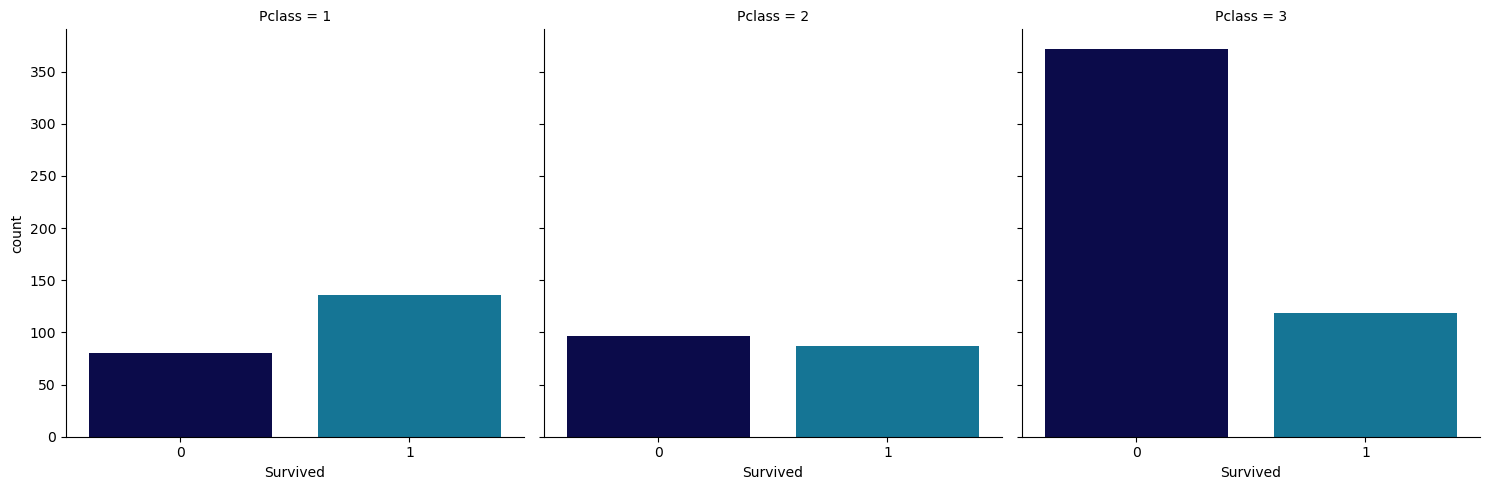

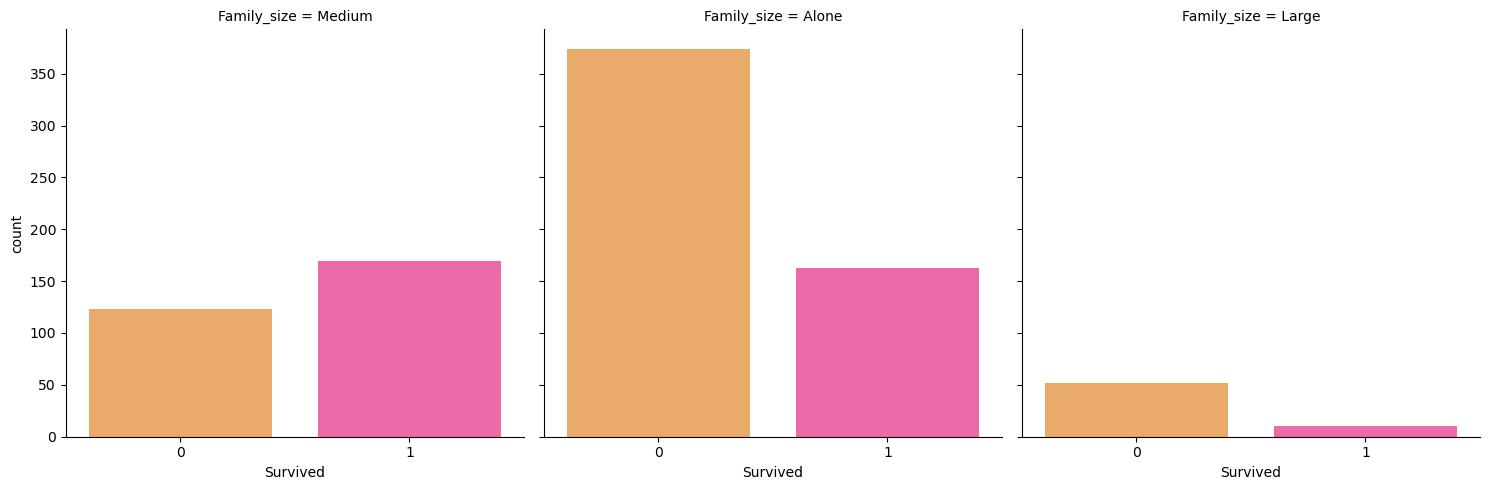

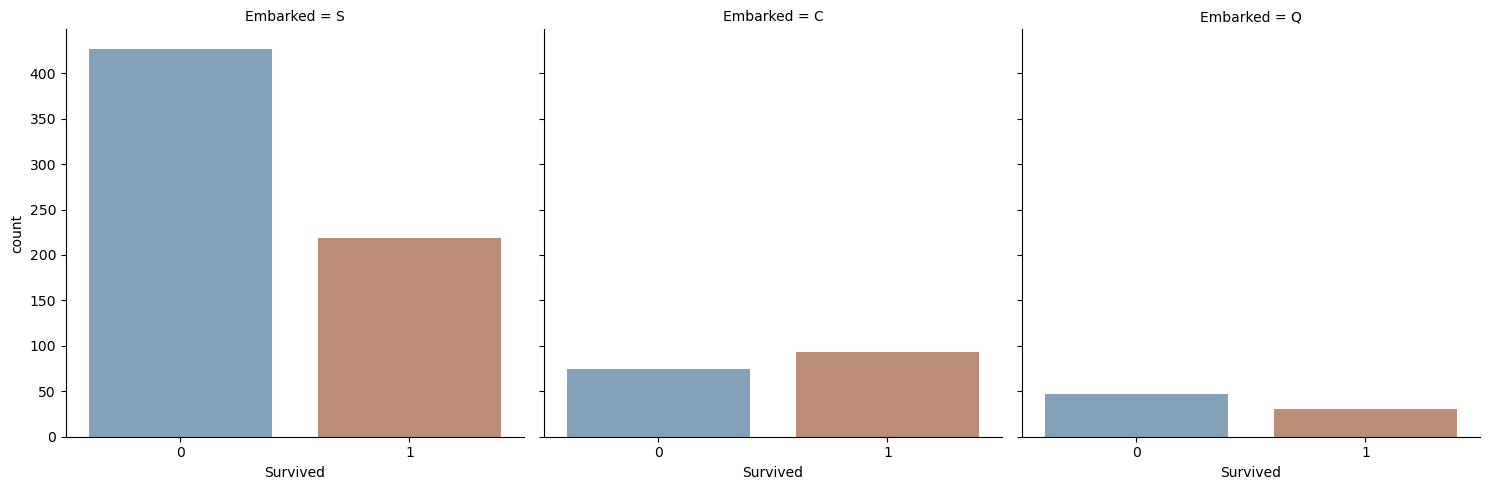

In [131]:
# Checking Survived level and Sex
sns.catplot(x = 'Survived', col = 'Sex', data = df, kind = "count", palette = "Dark2")
# Checking Survived level and Pclass
sns.catplot(x = 'Survived', col = 'Pclass', data = df, palette = "ocean", kind = "count")

# Checking Survived level and Family
sns.catplot(x = 'Survived', col = 'Family_size', data = df, palette = "spring_r", kind = "count")

# Checking Survived level and Embarked
sns.catplot(x = 'Survived', col = 'Embarked', data = df, palette = "twilight_shifted", kind = "count")
plt.show()

 1. In the first plot we can see there is signficant difference in the surivied female count has high than male.
 2. In second plot we can see the passenger those have 3rd class they have no change to survived. 
 3. The passenger they have no Siblings is Survived has less than Not Survived.
 4. The passenger they have no Parents/Children  is Survived has less than Not Survived. and they have Parents/Children her Survived and not Survived is equal.
 5. The passenger they belong Cherbourg is Survived has 50% more than Not Survived. and other are equal.

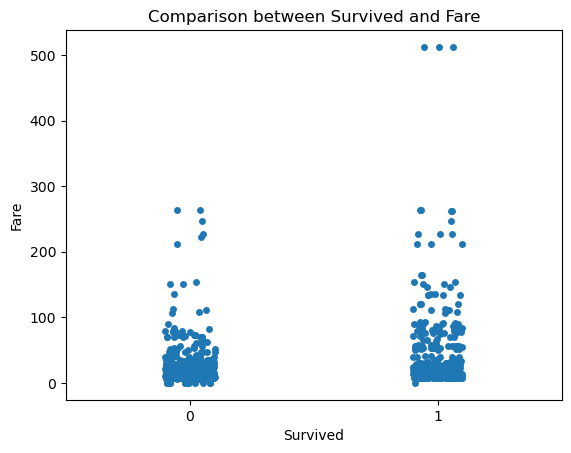

In [132]:
# Comparing Fare and Survived
plt.title("Comparison between Survived and Fare")
sns.stripplot(x = "Survived",y = "Fare", data = df)
plt.show()

There is not significatnt between the features and target, here both are in equal length.

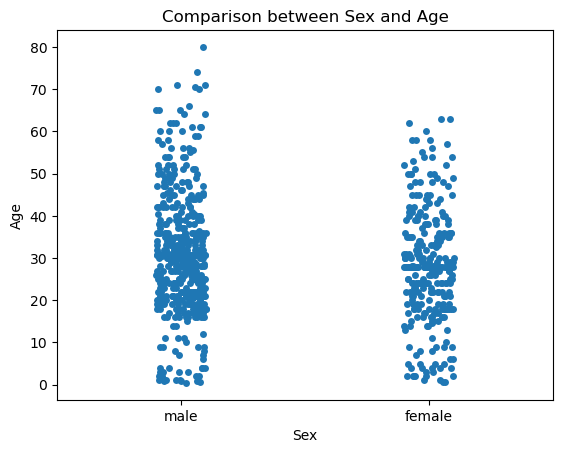

In [133]:
# Comparing Sex and Age
plt.title("Comparison between Sex and Age")
sns.stripplot(x = "Sex",y = "Age", data = df)
plt.show()

There is significatnt between the features, here 20-40  age the frequency male is high.

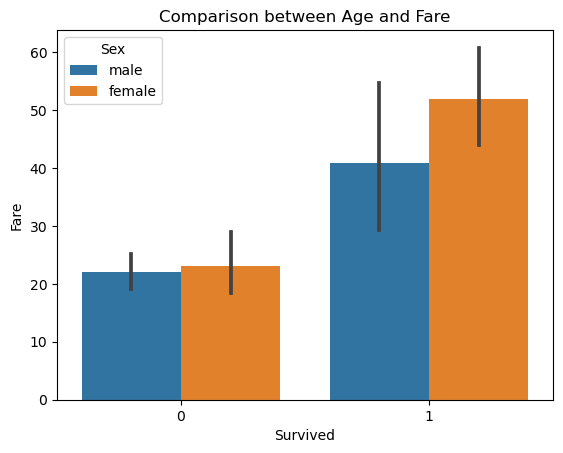

In [134]:
# Comparison between Age and Fare
plt.title("Comparison between Age and Fare")
sns.barplot(x = "Survived",y = "Fare", data = df,hue='Sex')
plt.show()

There is not significatnt between the features.

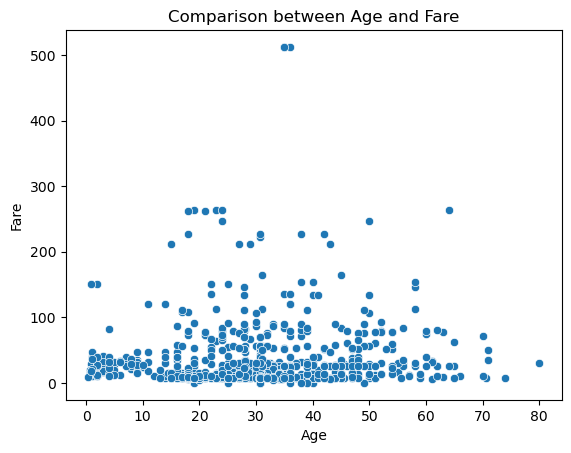

In [135]:
# Comparison between Age and Fare
plt.title("Comparison between Age and Fare")
sns.scatterplot(x = "Age",y = "Fare", data = df, palette = "bright")
plt.show()

There has not any relationship between numerical column.

### Multivariate Analysis

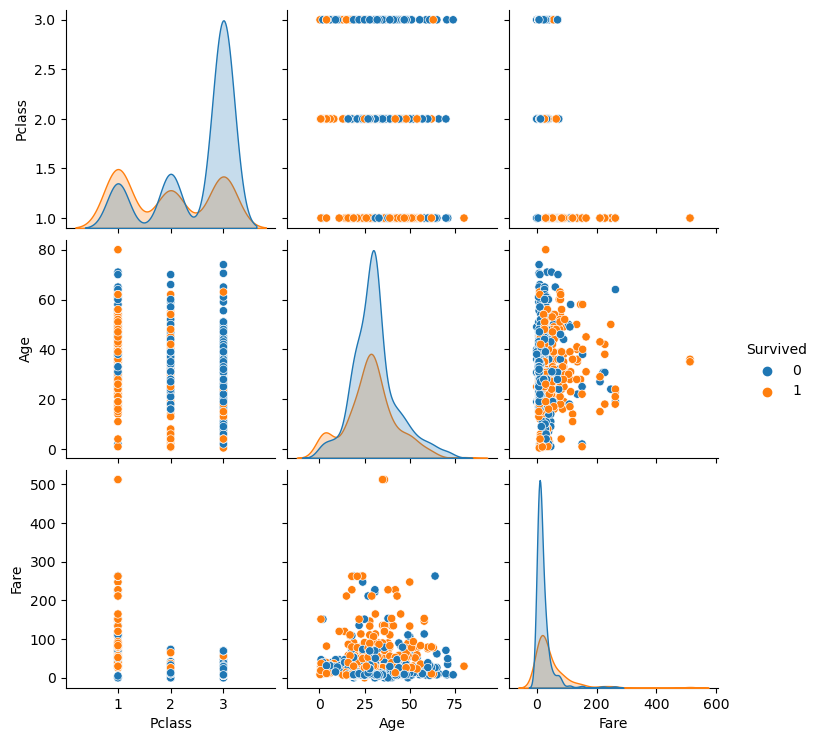

In [136]:
sns.pairplot(df,hue='Survived')
plt.show()

The pairplot gives the pairwise relation between the features on the basis of the Survived column.

### Checking the Outliers

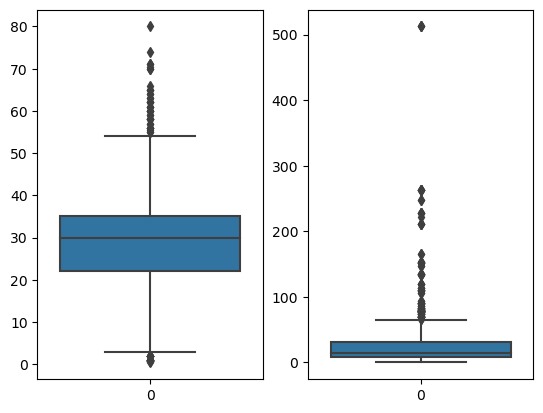

In [137]:
# Let's check the outliers by ploting boxplot
fig, axs = plt.subplots(1,2)

sns.boxplot(df['Age'], ax=axs[0])
sns.boxplot(df['Fare'], ax=axs[1])
plt.show()

So we have found outliers in Age and Fare.

So, removing the outliers using zscore and IQR techniques before building the model and selected best one.

In [138]:
from scipy.stats import zscore
out_features = df[['Age','Fare']]
z = np.abs(zscore(out_features))
z

,Age,Fare
0,0.594732,0.502445
1,0.635319,0.786845
2,0.287220,0.488854
3,0.404684,0.420730
4,0.404684,0.486337
...,...,...
886,0.210341,0.386671
887,0.825367,0.044381
888,0.139943,0.176263
889,0.287220,0.044381


### Z-score method

In [139]:
# Thersholds = 3
np.where(z>3)

(array([ 27,  88,  96, 116, 118, 258, 299, 311, 341, 377, 380, 438, 493,
        527, 557, 630, 672, 679, 689, 700, 716, 730, 737, 742, 745, 779,
        851], dtype=int64),
 array([1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1,
        1, 1, 0, 1, 0], dtype=int64))

In [140]:
# NOw removing the data above Zscore and creating new DF
df1 = df[(z<3).all(axis=1)]

df1.shape

(864, 7)

In [141]:
# Shape of old and New Dataframe
print("Old Data Frame - ",df.shape[0])
print("New Data Frame - ",df1.shape[0])

Old Data Frame -  891
New Data Frame -  864


In [142]:
print("Data Loss Percentage - ", ((df.shape[0] - df1.shape[0])/df.shape[0])*100)

Data Loss Percentage -  3.0303030303030303


In [143]:
df1.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Family_size
0,0,3,male,22.0,7.2500,S,Medium
1,1,1,female,38.0,71.2833,C,Medium
2,1,3,female,26.0,7.9250,S,Alone
3,1,1,female,35.0,53.1000,S,Medium
4,0,3,male,35.0,8.0500,S,Alone


It is affordable loss of data now we will check with IQR method

### IQR Method

In [144]:
# 1st quantile 
Q1 = out_features.quantile(0.25)

# 3rd quantile
Q3 = out_features.quantile(0.75)

#IQR
IQR = Q3 - Q1

df2 = df[~((out_features<(Q1 - 1.5 * IQR)) |(out_features>(Q3 + 1.5 * IQR))).any(axis=1)]

In [145]:
df2.shape

(721, 7)

In [146]:
print("Data Loss Percentage After removing outliers with IQR method - ",((df.shape[0] - df2.shape[0])/df.shape[0])*100)

Data Loss Percentage After removing outliers with IQR method -  19.07968574635241


**Used Z-score method because it remove less data.**

In [147]:
df = df1

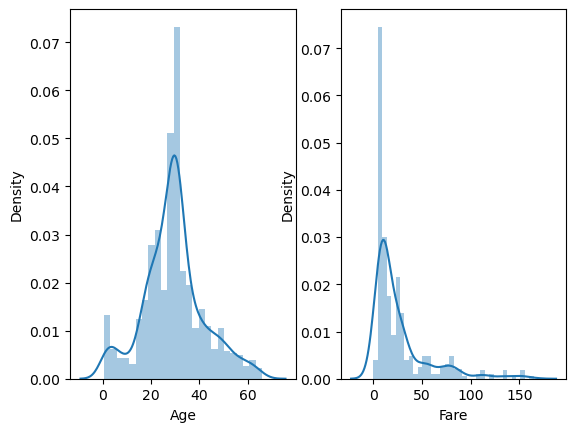

In [148]:
fig, axs = plt.subplots(1,2)

sns.distplot(df['Age'], ax=axs[0])
sns.distplot(df['Fare'], ax=axs[1])
plt.show()

## Checking for skewness

In [149]:
print("Skewness of Age column :",df['Age'].skew())
print("\nSkewness of Fare column :",df['Fare'].skew())

Skewness of Age column : 0.22967875570850158

Skewness of Fare column : 2.2571777277456286


The columns Fare have skewness in the data. Let's use cube root method to remove skewness.

## Removing skewness

In [150]:
# Removing skewness using log method
df['Fare'] = np.cbrt(df['Fare'])

In [151]:
# Checking skewness again
df['Fare'].skew()

0.6195881370757684

We can see the skewness has been reduced in Fare column.

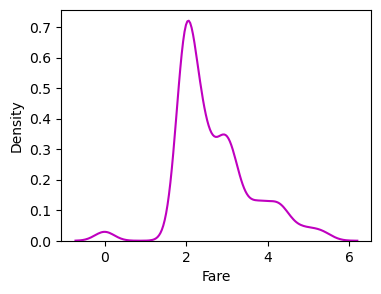

In [152]:
# Let's visualize how the data has been distributed in TotalCharges after removing skewness
plt.figure(figsize=(4,3))
sns.distplot(df['Fare'],color = "m", hist = False)
plt.show()

This looks almost normal and skewness is also removed.

## Encoding categorical columns

In [153]:
# Encoding categorical columns using OrdinalEncoder
from sklearn.preprocessing import OrdinalEncoder

OE = OrdinalEncoder(categories=[['male','female'],['S','C','Q'],['Alone','Medium','Large']])

df[['Sex','Embarked','Family_size']] = OE.fit_transform(df[['Sex','Embarked','Family_size']])
        
df

,Survived,Pclass,Sex,Age,Fare,Embarked,Family_size
0,0,3,0.0,22.000000,1.935438,0.0,1.0
1,1,1,1.0,38.000000,4.146318,1.0,1.0
2,1,3,1.0,26.000000,1.993730,0.0,0.0
3,1,1,1.0,35.000000,3.758647,0.0,1.0
4,0,3,0.0,35.000000,2.004158,0.0,0.0
...,...,...,...,...,...,...,...
886,0,2,0.0,27.000000,2.351335,0.0,0.0
887,1,1,1.0,19.000000,3.107233,0.0,0.0
888,0,3,1.0,27.915709,2.862294,0.0,1.0
889,1,1,0.0,26.000000,3.107233,1.0,0.0


In [154]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 864 entries, 0 to 890
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Survived     864 non-null    int64  
 1   Pclass       864 non-null    int64  
 2   Sex          864 non-null    float64
 3   Age          864 non-null    float64
 4   Fare         864 non-null    float64
 5   Embarked     864 non-null    float64
 6   Family_size  864 non-null    float64
dtypes: float64(5), int64(2)
memory usage: 54.0 KB


In [155]:
df.dtypes

Survived         int64
Pclass           int64
Sex            float64
Age            float64
Fare           float64
Embarked       float64
Family_size    float64
dtype: object

We have converted the categorical columns into numerical columns using Ordinal Encoding method.

## Correlation between target variable and independent variables.

In [156]:
# Checking the correlation between features and the target
corr = df.corr()
corr

,Survived,Pclass,Sex,Age,Fare,Embarked,Family_size
Survived,1.000000,-0.333535,0.534012,-0.074659,0.322959,0.105743,0.101417
Pclass,-0.333535,1.000000,-0.123990,-0.336215,-0.644931,0.061821,-0.018689
Sex,0.534012,-0.123990,1.000000,-0.088713,0.258840,0.118448,0.278706
Age,-0.074659,-0.336215,-0.088713,1.000000,0.106229,-0.007625,-0.233750
Fare,0.322959,-0.644931,0.258840,0.106229,1.000000,0.005015,0.443074
Embarked,0.105743,0.061821,0.118448,-0.007625,0.005015,1.000000,-0.042177
Family_size,0.101417,-0.018689,0.278706,-0.233750,0.443074,-0.042177,1.000000


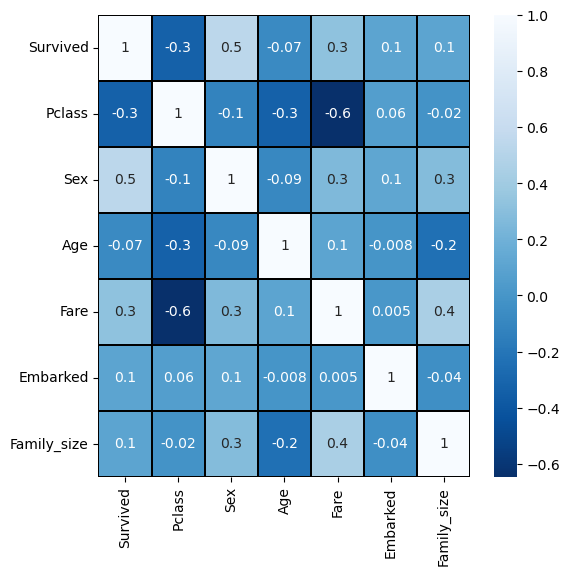

In [157]:
# Visualizing the correlation matrix by ploting heatmap
plt.figure(figsize = (6,6))
sns.heatmap(df.corr(), linewidths = 0.1, fmt = ".1g", linecolor = "black", annot = True, cmap = "Blues_r")
plt.yticks(rotation = 0);
plt.show()

This heatmap shows the correlation matrix by visulaizing the data. We can observe the relation between feature to feature and feature to label.

This heatmap contains both positive and negative correlation

 1. There is no much positive correlation between target and features
 2. There are -ve correlation between Fare and Pclass.

In [158]:
corr['Survived'].sort_values(ascending = False)

Survived       1.000000
Sex            0.534012
Fare           0.322959
Embarked       0.105743
Family_size    0.101417
Age           -0.074659
Pclass        -0.333535
Name: Survived, dtype: float64

We can observe the positive and negative correlated features with the target.

## Visualizing the correlation between label and features using bar plot

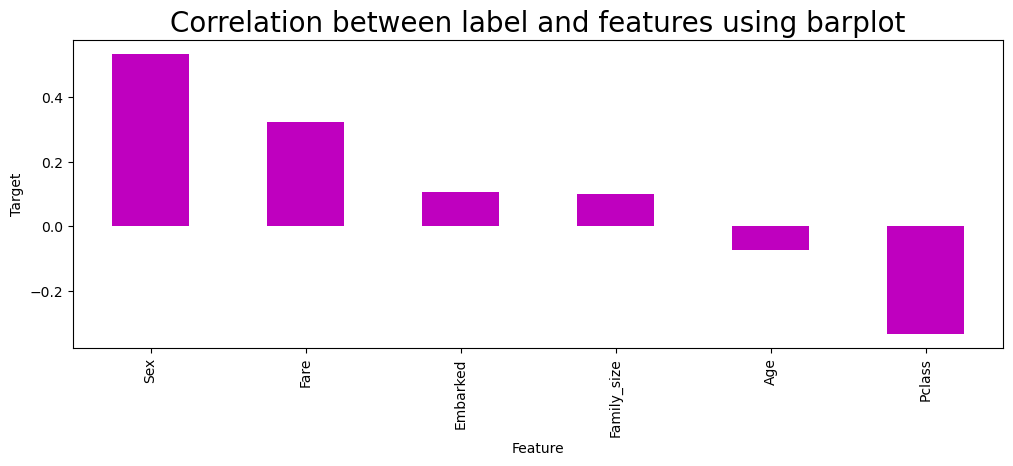

In [159]:
plt.figure(figsize = (12, 4))
df.corr()['Survived'].sort_values(ascending = False).drop(['Survived']).plot(kind='bar',color="m")
plt.xlabel('Feature')
plt.ylabel('Target')
plt.title("Correlation between label and features using barplot",fontsize=20)
plt.show()

From the above bar plot we can notice the positive and negative correlation between the features and target. Here the features Embarked and Family_size and 0.074659 have very less correlation with the target column.

## Sparating features and label

In [160]:
x = df.drop("Survived", axis = 1)
y = df["Survived"]

## Feature Scaling using Standard Scalarization

In [161]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x), columns = x.columns)
x

,Pclass,Sex,Age,Fare,Embarked,Family_size
0,0.801719,-0.733053,-0.588783,-0.809015,-0.556754,0.881145
1,-1.641615,1.364158,0.691419,1.596185,1.015257,0.881145
2,0.801719,1.364158,-0.268733,-0.745599,-0.556754,-0.745584
3,-1.641615,1.364158,0.451381,1.174441,-0.556754,0.881145
4,0.801719,-0.733053,0.451381,-0.734255,-0.556754,-0.745584
...,...,...,...,...,...,...
859,-0.419948,-0.733053,-0.188720,-0.356564,-0.556754,-0.745584
860,-1.641615,1.364158,-0.828821,0.465772,-0.556754,-0.745584
861,0.801719,1.364158,-0.115452,0.199305,-0.556754,0.881145
862,-1.641615,-0.733053,-0.268733,0.465772,1.015257,-0.745584


We have scaled the data using Standard Scalaization method to overcome the issue of biasness.

## Checking Variance Inflation Factor (VIF)

In [162]:
# Find variance inflation factor in each scaled column i.e. x.shape[1] (1/(1-R2))

from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(x.values, i) for i in range(len(x.columns))]
vif["Features"] = x.columns

vif

,VIF values,Features
0,2.201175,Pclass
1,1.139303,Sex
2,1.212707,Age
3,2.555353,Fare
4,1.034977,Embarked
5,1.593484,Family_size


So, we have not any multicolinearity issue, We can now move ahead for model building.

# Modelling

### Classification Model

In [163]:
## Classification Algorithms

# Models selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

# Models
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb

# Metrics
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,roc_curve

## Finding the best random state

In [164]:
maxAccu = 0
maxRS = 0
for i in range(1,500):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.30,random_state=i)
    RFC = RandomForestClassifier()
    RFC.fit(x_train,y_train)
    pred = RFC.predict(x_test)
    acc = accuracy_score(y_test,pred)
    if acc > maxAccu:
        maxAccu = acc
        maxRS = i
print("Best accuracy is ", maxAccu*100,"at random_state", maxRS)  

Best accuracy is  87.6923076923077 at random_state 95


Create a function to know that which random state is max accuracy.

The best accuracy score is 87.69 at random state of 95

In [165]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.30, random_state=maxRS)
print('Training feature matrix size:',x_train.shape)
print('Training target vector size:',y_train.shape)
print('Test feature matrix size:',x_test.shape)
print('Test target vector size:',y_test.shape)

Training feature matrix size: (604, 6)
Training target vector size: (604,)
Test feature matrix size: (260, 6)
Test target vector size: (260,)


### Metrics Function

In [166]:
# Create a function to check accuracy score,classification report, crossvalidaiton score etc.

def classify(model,x,y):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.30,random_state = maxRS)
    
    # Train the model
    model.fit(x_train,y_train)
    
    # Predict the model
    predF = model.predict(x_test)
    
    print('\033[1m',model,'\033[0m')
    
    # Check accuracy score
    acc_score = accuracy_score(y_test,predF)*100
    print("Accuracy Score :",acc_score)
    
    # Check classification report
    class_report = classification_report(y_test,predF)
    print("\nClassification Report :\n",class_report)
    
    # Check confusion matrix
    conf_score = confusion_matrix(y_test,predF)
    print("\nConfusion Matrix :\n",conf_score)
    
    # Cross Validation score
    cv_score = cross_val_score(model,x,y,cv=10)
    print("\nCross Validation Score   :",cv_score)
    cv_score2 = cv_score.mean()*100
    print("\nCross Validation Score :",cv_score2)
    
    # Different between accuracy or cv
    final = acc_score - cv_score2
    print("\nDifferent between Accuracy vs Cross Val Score:",final)
    print('\n')

We create a function to check accuracy score,classification report, crossvalidaiton score and also final score (accuracy score - cv score). Using this socre we test all the algorithms in one word.

In [167]:
RFC = RandomForestClassifier()
ETC = ExtraTreesClassifier()
LR = LogisticRegression()
GBC = GradientBoostingClassifier()
ABC = AdaBoostClassifier()
BC = BaggingClassifier()
SVM = SVC()
KNN = KNeighborsClassifier()
XGB = xgb.XGBClassifier()

In [168]:
models = [RFC,ETC,LR,GBC,ABC,BC,KNN,XGB]

model = 1
for i in models:
    if model<=8:
        classify(i,x,y)
    model+=1

 RandomForestClassifier() 
Accuracy Score : 86.15384615384616

Classification Report :
               precision    recall  f1-score   support

           0       0.85      0.94      0.89       158
           1       0.88      0.75      0.81       102

    accuracy                           0.86       260
   macro avg       0.87      0.84      0.85       260
weighted avg       0.86      0.86      0.86       260


Confusion Matrix :
 [[148  10]
 [ 26  76]]

Cross Validation Score   : [0.77011494 0.79310345 0.74712644 0.81609195 0.89534884 0.81395349
 0.84883721 0.74418605 0.86046512 0.84883721]

Cross Validation Score : 81.38064688585939

Different between Accuracy vs Cross Val Score: 4.773199267986769


 ExtraTreesClassifier() 
Accuracy Score : 84.61538461538461

Classification Report :
               precision    recall  f1-score   support

           0       0.85      0.91      0.88       158
           1       0.84      0.75      0.79       102

    accuracy                          

#### GradientBoostingClassifier is out best model as the differences between accuracy score and cross validation score is least.

**Different between Accuracy vs Cross Val Score: 1.5105997984907447**

### GradientBoostingClassifier is our best model

## Hyper Parameter Tuning

#### Tune the parameter with GradientBoostingClassifier

In [169]:
# Check parameter for hyper parater tuning
GBC.get_params().keys()

dict_keys(['ccp_alpha', 'criterion', 'init', 'learning_rate', 'loss', 'max_depth', 'max_features', 'max_leaf_nodes', 'min_impurity_decrease', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_iter_no_change', 'random_state', 'subsample', 'tol', 'validation_fraction', 'verbose', 'warm_start'])

In [170]:
# GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV

params = {'max_depth':range(1,10,2),
          'max_leaf_nodes':range(1,10,2),
          'min_samples_split':range(1,10,2),
          'n_estimators': range(1,10,2),
          'random_state': [10,50]
          }


# Train the model for best parameters
GCV = GridSearchCV(GBC,params,cv=5)
GCV.fit(x_train,y_train)

print('Best Score     -->',(GCV.best_score_))

print('Best Parameter -->',(GCV.best_estimator_))

Best Score     --> 0.8112258953168044
Best Parameter --> GradientBoostingClassifier(max_depth=5, max_leaf_nodes=9, min_samples_split=3,
                           n_estimators=9, random_state=10)


In [182]:
# Instantiate GradientBoostingClassifier with new parameters and train 

Final_model = GradientBoostingClassifier(max_depth=7, max_leaf_nodes=9, min_samples_split=3,
                           n_estimators=9, random_state=10)

Final_model.fit(x_train, y_train)
pred = Final_model.predict(x_test)
acc = accuracy_score(y_test, pred)
print(acc*100)

84.61538461538461


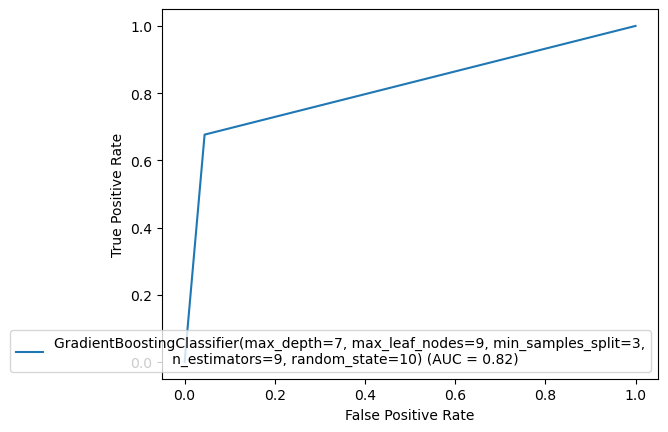

In [183]:
from sklearn import metrics
fpr, tpr, thresholds = metrics.roc_curve(y_test, pred)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name = Final_model)
display.plot()

Here we have plotted the ROC curve for the final model and the AUC value for the best model is 93.9%

### Saving the model

In [184]:
# Saving the model using .pkl
import joblib
joblib.dump(Final_model,"Titanic survived Project.pkl")

['Titanic survived Project.pkl']

### Predict the model

In [185]:
# Let's load the saved model and get the predictions
model = joblib.load("Titanic survived Project.pkl")

In [186]:
# Prediction 
prediction = model.predict(x_test)
prediction

array([0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)